In [22]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
import progress_learner
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [23]:
p = project.Project.load("../slidearound_project.proj")

In [24]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
reload(progress_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

with tf.variable_scope("search") as scope:
    policy_estimator = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = progress_learner.EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress_SlideAround.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress_SlideAround.mod


In [25]:
c.progress_threshold=0.93
reload(action_learner_search)
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, session = sess)
explorations = action_ln.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.77271127700805664), (0, 0.75858718156814575), (0, 0.7247881293296814), (0, 0.71771371364593506), (0, 0.69386118650436401), (0, 0.68880915641784668), (0, 0.68054705858230591), (0, 0.67147338390350342), (0, 0.66958600282669067)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(3, 0.91971009969711304), (5, 0.91798585653305054), (5, 0.90639138221740723), (3, 0.89587885141372681), (3, 0.88521277904510498), (8, 0.88105744123458862), (3, 0.85187447071075439), (8, 0.84320276975631714), (4, 0.8372616171836853)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
=== found_completed_act ===
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(2, 0.94040614366531372), (0, 0.91

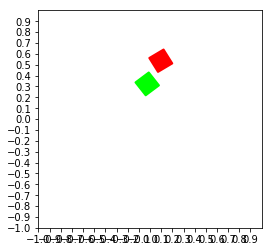

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.2468325   0.24736097  0.18016125]
[[ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.  -0.5]
 [-1.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]]
Progress = 0.55; reward = 0.55


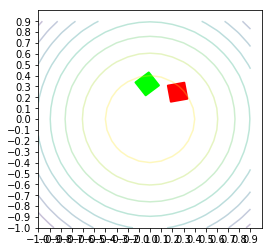

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.16479168  0.00778572  0.72506144]
[[ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.77; reward = 0.22


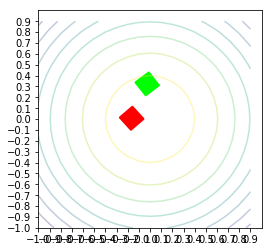

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.36508342  0.63935325  0.1298281 ]
[[ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [-1.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]]
Progress = 0.89; reward = 0.12


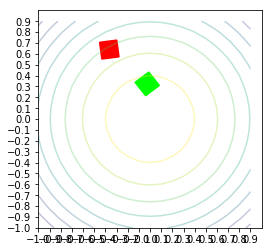

In [76]:
explorations[0].replay(verbose = True)

In [77]:
explorations[0].action_storage

[[0,
  [ 0.09620159  0.53687454  0.54786098] - 0.075,
  [ 0.2468325   0.24736097  0.18016125] - 0.075,
  array([ 0.23930095,  0.26183665,  0.19854624,  0.2468325 ,  0.24736097,
          0.18016125, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
          0.32366525,  0.65520882]),
  0.54755002,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [ 0.2468325   0.24736097  0.18016125] - 0.075,
  [-0.16479168  0.00778572  0.72506144] - 0.075,
  array([-0.1301075 ,  0.02797275,  0.67914719, -0.16479168,  0.00778572,
          0.72506144, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
          0.32366525,  0.65520882]),
  0.77140433,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [-0.16479168  0.00778572  0.72506144] - 0.075,
  [-0.36508342  0.63935325  0.1298281 ] - 0.075,
  array([-0.34293732,  0.56952132,  0.1956426 , -0.36508342,  0.63935325,
          0.1298281 , -0.025299

In [78]:
explorations[0].start_config

[Cube : [ 0.09620159  0.53687454  0.54786098],
 Cube : [-0.02529948  0.32366525  0.65520882]]

In [31]:
action_ln.env.reset()
explorations = action_ln.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.56834423542022705), (0, 0.5475500226020813), (0, 0.49258637428283691), (0, 0.47930771112442017), (0, 0.448149174451828), (0, 0.3297899067401886), (0, 0.30237892270088196), (0, 0.28405177593231201), (0, 0.26927211880683899)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(1, 0.77140432596206665), (1, 0.64370894432067871), (2, 0.61905944347381592), (2, 0.58811825513839722), (3, 0.57865965366363525), (0, 0.5683906078338623), (0, 0.56834423542022705), (0, 0.56834423542022705), (0, 0.56834423542022705)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(0, 0.88704341650009155), (4, 0.8448033332824707), (0, 0.83467310

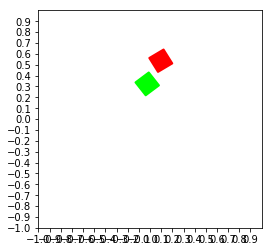

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.2468325   0.24736097  0.18016125]
[[ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.  -0.5]
 [-1.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]]
Progress = 0.55; reward = 0.55


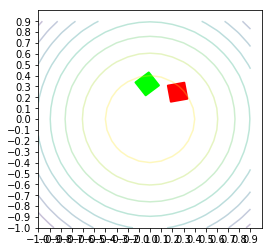

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.16479168  0.00778572  0.72506144]
[[ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.77; reward = 0.22


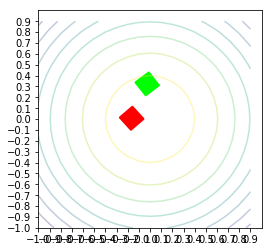

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.36508342  0.63935325  0.1298281 ]
[[ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [-1.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]]
Progress = 0.89; reward = 0.12


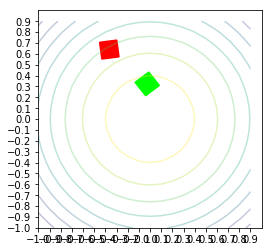

In [53]:
explorations[0].replay(verbose = True)

In [54]:
import visualizer
from utils import SESSION_NAME, SESSION_OBJECTS, SESSION_EVENTS, SESSION_LEN, SESSION_OBJ_2D, START, END
reload(visualizer)

<module 'visualizer' from 'D:\\git\\learn-to-perform\\visualizer.py'>

{0: [Cube : [ 0.09726659  0.53482762  0.54526127], Cube : [ 0.10486507  0.52022328  0.52671287], Cube : [ 0.11246356  0.50561893  0.50816447], Cube : [ 0.12006205  0.49101459  0.48961607], Cube : [ 0.12766054  0.47641025  0.47106768], Cube : [ 0.13525902  0.46180591  0.45251928], Cube : [ 0.14285751  0.44720157  0.43397088], Cube : [ 0.150456    0.43259722  0.41542249], Cube : [ 0.15805449  0.41799288  0.39687409], Cube : [ 0.16565297  0.40338854  0.37832569], Cube : [ 0.17325146  0.3887842   0.3597773 ], Cube : [ 0.18084995  0.37417986  0.3412289 ], Cube : [ 0.18844844  0.35957551  0.3226805 ], Cube : [ 0.19604692  0.34497117  0.3041321 ], Cube : [ 0.20364541  0.33036683  0.28558371], Cube : [ 0.2112439   0.31576249  0.26703531], Cube : [ 0.21884239  0.30115814  0.24848691], Cube : [ 0.22644087  0.2865538   0.22993852], Cube : [ 0.23403936  0.27194946  0.21139012], Cube : [ 0.24163785  0.25734512  0.19284172], Cube : [ 0.23710541  0.24169957  0.19303778], Cube : [ 0.22287709  0.233418

<source src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAPVRtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1MiByMjg1MSBiYTI0ODk5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAY8GWIhAA3//728P4FNjuY0JcRzeidMx+/Fbi6NDe9zgAAAwAAN9zmRP7KkwbmwAAC4AAKkm9s4hQ8wDZ7QNAoLzst+pDZir6YwjKE/xmfvKj7XdjIO5sdYl90F63obQwQbx/BLvvMCrsFUyjbBaO7x+zLAZ5AxeUlgHVlewxl2SdPd8iFzVS5/PGrIojFZE5zIyzt2KVVaj43ZdgxeiP2rvf56st0PGryI3qBMQjqxiL7glI4LmQ8BQJiCTMzAB3DoWhcEZ32wukjwYaOzKJH7D2hBtTaB/vMF3Qk2ARz5P0xpFJ9MZxx1kmn8eLhVIXBnFgvyxvdq7/lC5qnVUmvjG2PTuAKzSsyVueO3agFC73HeSX3QCMTVhTB0mKzVKFSXXrVQSSb3EZLeiEUTDIzKDTdbox0uSlYJIpX2H8PAErFWVRDx5Y7EdrWy9723WIEAAADAOT+tcedo/a1kyybT2hRK6242J1OKSbz2BdKSdnkqttMEV3LYFnZ/+fNnj26YjfnFZzH9lNkh6t+3qIh12peOjsYQQ3wtNgyFy4DQFq3tKU1JHdBPXyeiWFjX6BrUvrlUy5YAPNHfW5aI7MFrH89Ec78jwWEfT5YNMOdOmFu+KsAj914tW10M8o4OAVRItxO6my2s9+PK3c3WU2wOH6+Jli5zcHUl4GtbeY0+1GXluMlHOB2nbpr85biJbURckjnL+jWfhBpTD7s6hTXfZAGl05RoClDCP4NcZULfWvtzBSejSlXgxedn3s/eGRc1tMu/KUR7D3+Ko3jeoZ2tfkgX6cy36GnWyZdthc8NjK+4iheW/cE59djJuGf53W1Fkm+Z0DM76oNR5PnnPJDdN3scEGxxiQBzYu1NMBCG/+GftThX3KbFgFOpbNPmrPvxH3tttdtiXtNG8su5r6exyroCu2WPL55C2fm5C1Akdfb5XniVV+Ghl71WzpbzDaD8MxE2NJEZPIvT21cZye0sBJ7WIokLlYjYm5htidJI6ZUUOU2oz0sQqPfn0ZeZ7L/AorXK9lBy0u3eK0xz7C22UjLnC0THjTiFERRov1jtkYSw9NDHQoN6DGaC477e2RdZMzAd6moutm7aUfYF0hWv5ReyjbjUqmBgH7lKC+lbb7VSMPe58/MG2dguFJiN1462+tQbgWSempxfbxsOX+W7CVKGD+DPU0dD+Mv3+bryxCmIybykQBHHelk5aIBkof+fYQU3jhjy3r8ipAU0i7lghgEb52x540X0NDgykKRuoXpsxHBPcyoosOJY0nGhOAApXnK7SJRo5vCbC+TB3kppbhqeqEh2iqEx596M0tUbPuTsSoi6W0S+7Gxll6sbQpKEiZE3/Rh/wPvLZqh4XGNYR1/RvIAsvqakyRXiIH6Jv82fLd+ICYgYbPVVpgFQtLN0oe/2n1eelC+2Yr1X8uZtiFQLPo7GPSEMsQX5m+hEcYV2eEx9OW2CguR3vVGpRt0IaPHkpbe/Y4iKwg3RMq22qXTHkrke92lHgngQ8k9kBHQbJvLCI8eRXGXd3IMhqhEQvbHGA7rQOmmqjLYYn1M9HPDa3kdMBsP19vObfuGSNCG5Iph07emgJIScBY868l7iglv4aWPdLUqEiAH80y+oKl4LI27b+ZOGYteNVkcPxOUwDUxLD+Xy/uz8TwMrV38VupVIcq3RPkx5vYf8+XRhQJWBu9HKdi/IlqT9W0sM84KBBEzN6jx1db/adpdPu5AKOHOH38o342sANSijUSNo3PHmDqs8YSaUbTk+LUnfdawudqLGqgR65d6PodZL3u+oaRtAQWyBHSO06tsbT1q4E8d40PbND5RIdfjJJnKvNk9L/1r5Z55mZzJkfThct/WBFPN6D+rCQmlta+WgjawKnLmujtVwbjTw2cN8Epyazj3xc5Ft1Y4cHil5dzzczwJi0ADNb4rAAB+QY86F2RDTQ3BqPjIkGbjBgPD7Dg/zJECogzi1ve3an0hsPfCkfJYUaIXtiXZyyD/gsoVf5Ekm25CjdZmCs9iX4RHy+To7kYmn2897AmjO2rnK/CqUljw/E5q/EZ8OiOs3OhX6cVG2ryfmi7kXhtyN4A1YnK0iRQoLE6urJrXd7VOs38yPqQCV9rUIueD/8HZc48/wNcoZ+YyacqhQpUmn9J3w1TxSsf/5UYRuYV5SRTVHmaVAzxF1RMT3E67wis4+Erwjagpl3p22FVHNATo2D2owhegl3V19QNRDd/eS99GNO3A8cH4VAnh39PQEHydmTqermAriK0zvzBQxGSjUDO7c8rK/JYUdAuagsM+QpFqCb5j4gQ3mZ2FL+d6zGSYDhI14Vzky4jEhv2WtRa0axmuwxyL1cI64rRm8NaR296pC/sYBwok07FLZdG/guWW21YPQWBv5o3jJ48AQVVy59VF+qZErwgDdLGzRJLx12Cv90ztHrCiDPHWeMY6izK9+vEt24LRKa7rTwTxD0siIKrOKRiY6D0B1QQ06zIN0Bwowh1/FTZg3sumhau7wKXhop7jBSz7iEFwecKXjuE9NOpMuxRbk0IHBayohSNNqcLI+EMEJHpC+fnmANnZ3EmO2c/JjDdf224IUvnuU/XbGghJ6Lz0F8MhkLItsX+Zqhymim4vqtdIjp1iIelBCU6qSALVyXKuZ/Bo/Ha81Chh+s5lVtvf3PoUHh2mu/RLBi8M56NBmmADfnhkhds4aUmgrrj3a9omQ8Okw0/PgSJzBk7F13T6WjK3HwSy98NnkBOw/2Iq/i5+gNQZzwygXPUCX7rhAMIVIEvDXMkGJF4dQZnMeEv46QdDYvYmeKLvK590zHSe8Z6LTcSdrxCYKvOX9L+LPuBn2afbi9ASUMUgSd1Mo9VdAGUg4+ad7tvcRTbrbWFoLjFrj0jq7w1YWPG0+5uGwEt4CAvwLnes1Yz0us1iLwsT6FulFdp0S4QXbPet62kcnB3o+rpyrqRsXPhx9nRy/0VuWVL3C5x/bj7n2

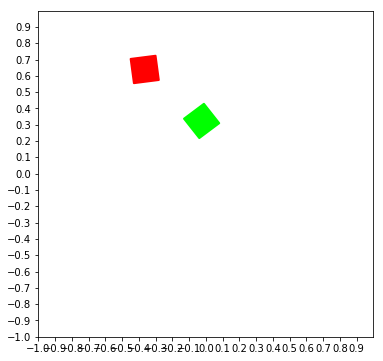

In [66]:
session = explorations[0].capture_last(90)
print (session[SESSION_OBJ_2D])
# visualizer.animate (session, 0, 20 , name = "around1.mp4'")
visualizer.animate(session , 0, 90, name = "slide_around_1.mp4", min_x = -1, max_x = 1, min_y =  -1, max_y = 1,  )

In [4]:
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [9]:
a.test_case(a.bad_case_2)

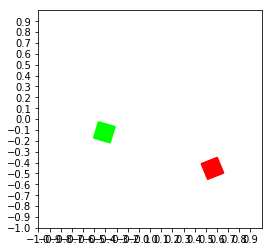

(None, None)
[ 0.54158484  0.86653476  0.79448832]
[[  5.97815504e-01  -2.88982756e-01   6.56714307e-01  -4.26935396e-01
    5.18761667e-01  -4.85834199e-01   4.59862864e-01  -3.47881559e-01
   -2.91269967e-03   6.67894730e-02  -8.66839674e-05   6.80305677e-02
    1.15441067e-03   6.52045520e-02  -1.67160503e-03   6.39634573e-02
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05767885e+00  -2.60684700e-01   9.72936203e-01  -3.55427005e-01
    8.78193898e-01  -2.70684355e-01   9.62936548e-01  -1.75942050e-01]
 [  5.94902805e-01  -2.22193283e-01   6.56627623e-01  -3.58904829e-01
    5.19916077e-01  -4.20629647e-01   4.58191259e-01  -2.83918101e-01
   -2.92857466e-03   6.67474633e-02  -1.28693743e-04   6.80464427e-02
    1.17028566e-03   6.52465617e-02  -

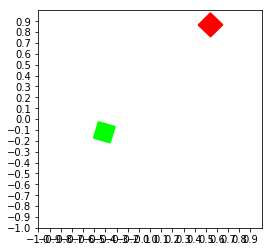

(None, None)
[-0.49951228 -0.69036695  0.15960644]
[[  5.96946508e-01  -2.69012591e-01   6.56692777e-01  -4.06600321e-01
    5.19105047e-01  -4.66346590e-01   4.59358778e-01  -3.28758860e-01
   -7.08357206e-03   1.61448859e-01  -3.12293006e-04   1.64591745e-01
    2.83059363e-03   1.57820466e-01  -3.94068543e-03   1.54677580e-01
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05680986e+00  -2.40714535e-01   9.72914673e-01  -3.35091929e-01
    8.78537279e-01  -2.51196745e-01   9.62432462e-01  -1.56819351e-01]
 [  5.89862936e-01  -1.07563732e-01   6.56380484e-01  -2.42008575e-01
    5.21935641e-01  -3.08526123e-01   4.55418093e-01  -1.74081280e-01
   -7.16769316e-03   1.61199987e-01  -5.61164637e-04   1.64675866e-01
    2.91471472e-03   1.58069338e-01  -

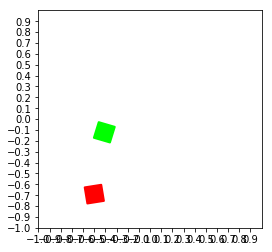

(None, None)
[ 0.41131718 -0.26221855  0.36441135]
[[  5.89942178e-01  -1.09357392e-01   6.56385316e-01  -2.43839024e-01
    5.21903684e-01  -3.10282162e-01   4.55460546e-01  -1.75800530e-01
   -9.44131389e-03   2.11962371e-01  -7.86591985e-04   2.16596742e-01
    3.84777834e-03   2.07942020e-01  -4.80694357e-03   2.03307649e-01
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.04980553e+00  -8.10593361e-02   9.72607212e-01  -1.72330632e-01
    8.81335916e-01  -9.51323181e-02   9.58534230e-01  -3.86102193e-03]
 [  5.80500864e-01   1.02604979e-01   6.55598724e-01  -2.72422824e-02
    5.25751462e-01  -1.02340143e-01   4.50653602e-01   2.75071191e-02
   -9.55857689e-03   2.11523417e-01  -1.22554618e-03   2.16714005e-01
    3.96504134e-03   2.08380974e-01  -

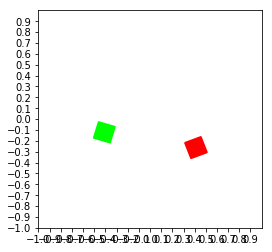

In [10]:
a.replay(verbose = True)

In [182]:
import numpy as np
a = np.zeros((2,3))

In [183]:
np.reshape(a, [-1])

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [184]:
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [185]:
a.shape

(2, 3)

In [186]:
a.shape[1:]

(3,)

In [11]:
import numpy as np 

In [15]:
inputs = np.zeros((20, 7))
inputs[:,1] = [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0., -1., -1.,  0.,  1., -1.,  0.,  1.,  1.,  0.,  0.,  1.]
inputs = np.repeat(np.expand_dims(inputs, axis = 0), c.batch_size, axis = 0)

progress_estimator.predict(inputs, sess = sess)

array([ 0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679], dtype=float32)

In [40]:
import io
import base64
from IPython.display import HTML

video = io.open('basic_animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

FileNotFoundError: [Errno 2] No such file or directory: 'basic_animation.mp4'

In [62]:
import pickle

In [72]:
saved_data = { "start_config" : explorations[0].start_config, "action_storage" : explorations[0].action_storage } 
with open('exp.dat', 'b+w') as fh:
    pickle.dump(saved_data, fh)

In [73]:
with open('exp.dat', 'b+r') as fh:
    loaded_data = pickle.load(fh)

In [74]:
print (loaded_data)

{'start_config': [Cube : [ 0.09620159  0.53687454  0.54786098], Cube : [-0.02529948  0.32366525  0.65520882]], 'action_storage': [[0, [ 0.09620159  0.53687454  0.54786098] - 0.075, [ 0.2468325   0.24736097  0.18016125] - 0.075, array([ 0.23930095,  0.26183665,  0.19854624,  0.2468325 ,  0.24736097,
        0.18016125, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
        0.32366525,  0.65520882]), 0.54755002, True, array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32)], [0, [ 0.2468325   0.24736097  0.18016125] - 0.075, [-0.16479168  0.00778572  0.72506144] - 0.075, array([-0.1301075 ,  0.02797275,  0.67914719, -0.16479168,  0.00778572,
        0.72506144, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
        0.32366525,  0.65520882]), 0.77140433, True, array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32)], [0, [-0.16479168  0.00778572  0.72506144] - 0.075, [-0.36508342  0.63935325  0.1298281 ] - 0.075, array([-0.34293732